# Ensemble Study (Key on Random Forest)

Reference :
- https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/?
- https://s3.amazonaws.com/kajabi-storefronts-production/file-uploads/sites/2147512189/themes/2150624317/downloads/4eb77-adc8-7d84-6ec8-8781264f6417_Random_Forest.pdf
- https://s3.amazonaws.com/kajabi-storefronts-production/file-uploads/sites/2147512189/themes/2150624317/downloads/e4fbc2f-c755-ed1a-c18-f18ec25eb0d_Ensemble_Learning_Bagging_Boosting_and_Stacking.pdf

<h2 id="01">1. Definition</h2>

Ensemble learning is a machine learning technique where multiple models are trained on a dataset to make predictions, and the **predictions of those models are combined to produce a more accurate and robust prediction** than any of the individual models. In other words, ensemble learning is about combining the predictions of several weaker models to create a stronger model.

## 2. Types

### Simple Ensemble Techniques

<h4 id="02">1. Max Voting</h4>

**Definition :** The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. **The predictions which we get from the majority of the models are used as the final prediction**.

**Sample Code:**

In [6]:
import pandas as pd
# read the text file into a pandas dataframe
df = pd.read_csv("/Users/crystal/Desktop/Random Forest/heart.csv")

In [5]:
# IMPORTS
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
warnings.filterwarnings('ignore')

In [7]:
# SPLITTING THE DATASET
x = df.drop('target', axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
# MODELS CREATION
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

LogisticRegression()

The final prediction is stored in a numpy array called final_pred which is initialized as an empty array using the np.array([]) function. The code then runs a for loop from 0 to the length of the x_test variable (which represents the test dataset). Inside the loop, the mode function from the statistics library is used to calculate the mode of the three model predictions for each observation in the test dataset. These three model predictions are stored in pred1, pred2, and pred3. **The mode function returns the most common prediction value among the three predictions.** The resulting mode prediction is appended to the final_pred array using the np.append function. Finally, the final_pred array is printed using the print function to show the mode predictions for each observation in the test dataset.

In [10]:
# PREDICTION
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

# FINAL_PREDICTION
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i]]))
print(final_pred)

[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]


Alternatively, you can use **“VotingClassifier”** module in sklearn as follows:

In [14]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9658536585365853

#### 2. Averaging

**Definition:** : Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. **Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.**

In [18]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1+pred2+pred3)/3

In [19]:
#print(finalpred)

#### 3. Weighted Averaging

**Definition:** This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. 

In [29]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

In [20]:
#finalpred

### 1). Bagging

**Definition :**  <br>
Bagging, short for **Bootstrap Aggregating**, is a machine learning technique that involves training multiple models (such as decision trees) on **different subsets of the original training data**, created through bootstrapping, which is a sampling technique that involves **creating subsets of observations from the original dataset with replacement**. The final output is determined by combining the outputs of all the models through a voting process. Bagging is often used to improve the accuracy and stability of machine learning models, especially in cases **where the training data is noisy or prone to overfitting**. Random Forest is an example of a machine learning algorithm that uses the bagging technique.

**Models :** 
- Bagging meta-estimator
- Random forest

#### Random Forest (Key)

**1. Steps :**
1. Draw a random bootstrap sample of size (randomly choose examples from the training dataset with replacement).
2. Grow a decision tree from the bootstrap sample. At each node: 
- Randomly select features without replacement. e.g., if there are 20 features, choose a random five as candidates for constructing the best split.
- Split the node using the feature that provides the best split according to the objective function, e.g., maximizing the information gain.
3. Repeat steps 1-2 times. Essentially, we will build decision trees.
4. Aggregate the prediction by each tree to assign the class label by majority vote (classification) or take the average (regression).

**2. Features**
- Diversity: Not all attributes/variables/features are considered while making an individual tree; **each tree is different**.
- Immune to the curse of dimensionality: **Since each tree does not consider all the features, the feature space is reduced**.
- Parallelization: Each tree is created independently out of different data and attributes. This means we can fully use the CPU to build random forests.
- Train-Test split: In a random forest, **we don’t have to segregate the data for train and test as there will always be 30% of the data which is not seen by the decision tree**.
- Stability: Stability arises because the result is based on **majority voting/ averaging**.

**3. Pros & Cons** <br>
*Pros* : <br>
1. Has a better generalization performance than an individual decision tree due to randomness (the combination of bootstrap samples and using a subset of features), which helps to **decrease the model’s variance (thus low overfitting)**. So it corrects decision trees' habit of overfitting the training data.
2. Doesn’t require much parameter tuning. Using full-grown trees seldom costs much and results in fewer tuning parameters.
3. **Less sensitive to outliers in the dataset**.
4. It generates feature importance which is helpful when interpreting the results. <br>
*Con* : <br>
1. Computationally expensive. It is fast to train but quite slow to create predictions once trained. More accurate models require more trees, which means using the model becomes slower.

**Hyperparameters**
1. Hyperparameters to Increase the Predictive Power
- n_estimators: Number of trees the algorithm builds before averaging the predictions.
- max_features: Maximum number of features random forest considers splitting a node.
- mini_sample_leaf: Determines the minimum number of leaves required to split an internal node.
- criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)
- max_leaf_nodes: Maximum leaf nodes in each tree

2. Hyperparameters to Increase the Speed
- n_jobs: it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor, but if the value is -1, there is no limit.
- random_state:controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and has been given the same hyperparameters and training data.
- oob_score: OOB means out of the bag. It is a random forest cross-validation method. In this, one-third of the sample is not used to train the data; instead used to evaluate its performance. These samples are called out-of-bag samples.

**Sample Code:**

In [21]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [20]:
import pandas as pd
df_02 = pd.read_csv('/Users/crystal/Desktop/Random Forest/heart_v2.csv', delimiter=',')

In [26]:
df_02.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


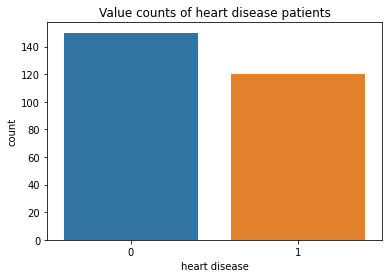

In [25]:
sns.countplot(df_02['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

In [28]:
#3. Putting Feature Variable to X and Target variable to y.
# Putting feature variable to X
X = df_02.drop('heart disease',axis=1)
# Putting response variable to y
y = df_02['heart disease']

In [29]:
#4. Train-Test-Split is performed
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [31]:
#5. Let’s import RandomForestClassifier and fit the data.
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


### 2). Boosting 

**Definition :** <br>
Boosting is an ensemble learning technique in which multiple weak models are combined to generate a final output. **Unlike bagging, boosting works by building models in series, where each subsequent model attempts to correct the errors of the previous model**.<br>
In boosting, each model is trained on the original data set, but with different weights assigned to each data point. *The weights of the misclassified data points are increased, while the weights of the correctly classified data points are decreased.* This helps the subsequent models to focus more on the misclassified data points and improve the overall accuracy of the final model.<br>
On the other hand, bagging is also an ensemble learning technique in which **multiple models are trained independently on different subsets of the original data set**. In bagging, the subsets are generated through bootstrap sampling, which involves randomly selecting a subset of the data set with replacement. Each model generated from the bootstrap sample is trained independently, and the final output is obtained by combining the results of all models through majority voting. <br>
In summary, the main difference between bagging and boosting is the way the models are combined. **Bagging involves training multiple models independently and combining their results through majority voting, while boosting involves building models in series, with each subsequent model attempting to correct the errors of the previous model**.

<img style="float: left;" src="https://lh3.googleusercontent.com/bEfpUmjNGzKBCV6gEq6GzWeELTCYEoabucBughc-tUmkKA-j8eM04dBglRwaz4amaGS4ut3EbQJ3a_Nv9VA6sGNoGDonxv8mUg_ysN2goqu0WlIP38hvm7w2QSs5MBcNWwqK2xw5=s0" width="70%"> 

**Models :**
- AdaBoost
- GBM
- XGBM
- Light GBM
- CatBoost

**Difference between Bagging and Boosting**

<img style="float: left;" src="https://av-eks-blogoptimized.s3.amazonaws.com/4661536426211ba43ea612c8e1a6a1ed4550721164.png" width="35%"> 

|  | Individual Learners | Bias-Variance |
| :-----| ----: | :----: |
| **Bagging** | Independent, Built in parallel | Reduce variance |
| **Boosting** | Dependent, Built sequentially | Reduce bias |

**Steps:**

1. A subset is created from the original dataset.
2. Initially, all data points are given equal weights.
3. A base model is created on this subset.
4. This model is used to make predictions on the whole dataset. <br>
<img style="float: left;" src="https://av-eks-blogoptimized.s3.amazonaws.com/dd1-e1526989432375.png" width="15%">

5. Errors are calculated using the actual values and predicted values.
6. The observations which are incorrectly predicted, are given higher weights.*(Here, the three misclassified blue-plus points will be given higher weights)*
7. Another model is created and predictions are made on the dataset.
(This model tries to correct the errors from the previous model) <br>
<img style="float: left;" src="https://av-eks-blogoptimized.s3.amazonaws.com/dd2-e1526989487878.png" width="15%"> 

8. Similarly, multiple models are created, each correcting the errors of the previous model.
9. The final model (strong learner) is the weighted mean of all the models (weak learners) <br>
<img style="float: left;" src="https://av-eks-blogoptimized.s3.amazonaws.com/boosting10-300x205.png" width="30%"> 

Thus, the boosting algorithm **combines a number of weak learners to form a strong learner**. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

### 3).Stacking

**Definition :** Stacking is a popular ensemble learning technique that involves combining multiple individual models to improve overall prediction performance. 

The basic idea behind stacking is to **train several base models on the same dataset, then use their predictions as inputs to a meta-model**. The meta-model can be trained on the same dataset or a different dataset, using the base model predictions as input features. Once the meta-model is trained, it can be used to predict the final outcome on new data.

**Below is a step-wise explanation for a simple stacked ensemble**

1. The train set is split into 10 parts.

<img style="float: left;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-11-768x555.png" width="35%"> 

2. A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.

<img style="float: left;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-10-768x638.png" width="30%"> 

3. The base model (in this case, decision tree) is then fitted on the whole train dataset.

4. Using this model, predictions are made on the test set.

<img style="float: left;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-2-768x577.png" width="35%"> 

5. Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set.

<img style="float: left;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-3-768x573.png" width="35%"> 

6. The predictions from the train set are used as features to build a new model.

<img style="float: left;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image12.png" width="25%"> 

7. This model is used to make final predictions on the test prediction set.

**Sample Code**

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

In [103]:
# SPLITTING THE DATASET
df = pd.read_csv("/Users/crystal/Desktop/Random Forest/heart.csv")
x = df.drop('target', axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [109]:
# Split train and test data into two parts
train1, train2, y_train1, y_train2 = train_test_split(x_train, y_train, test_size=0.5, random_state=1)

# Train and predict on the first base model
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(train1, y_train1)
train_pred1 = model1.predict_proba(train2)[:, 1]
test_pred1 = model1.predict_proba(x_test)[:, 1]

# Train and predict on the second base model
model2 = KNeighborsClassifier()
model2.fit(train1, y_train1)
train_pred2 = model2.predict_proba(train2)[:, 1]
test_pred2 = model2.predict_proba(x_test)[:, 1]

# Only select rows that correspond to the same data points in train_pred1 and test_pred1
train_pred2 = train_pred2[train2.index.isin(train1.index)]
test_pred2 = test_pred2[x_test.index.isin(train1.index)]

# Combine predictions from base models into a single dataframe
train_pred1 = pd.DataFrame(train_pred1)
train_pred2 = pd.DataFrame(train_pred2)
test_pred1 = pd.DataFrame(test_pred1)
test_pred2 = pd.DataFrame(test_pred2)

df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

# Fill any missing values with 0
df.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# Train a logistic regression model on the stacked predictions
model = LogisticRegression()
model.fit(df, y_train2)

# Make predictions on the test set using the stacked model
y_pred = model.predict(df_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score of the stacked model:", accuracy)

Accuracy score of the stacked model: 0.9658536585365853


### 4). Blending

**Definition :** Blending follows the same approach as stacking but **uses only a holdout (validation) set from the train set to make predictions**. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. Here is a detailed explanation of the blending process:

**Below is a step-wise explanation for a simple stacked ensemble**

1. The train set is split into training and validation sets.

<img style="float: left;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-7-768x579.png" width="25%">

2. Model(s) are fitted on the training set.

3. The predictions are made on the validation set and the test set.

<img style="float: left;" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/image-5-768x582.png" width="25%">

4. The validation set and its predictions are used as features to build a new model.

5. This model is used to make final predictions on the test and meta-features.

**Sample Code**

We’ll build two models, decision tree and knn, on the train set in order to make predictions on the validation set.

In [15]:
# SPLITTING THE DATASET
df = pd.read_csv("/Users/crystal/Desktop/Random Forest/heart.csv")
x = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
# Split the training data into three parts: train1, train2, and val
train1, train2, y_train1, y_train2 = train_test_split(x_train, y_train, test_size=0.5, random_state=1)
train2, val, y_train2, y_val = train_test_split(train2, y_train2, test_size=0.5, random_state=1)

# Train and predict on the first base model
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(train1, y_train1)
train_pred1 = model1.predict_proba(train2)[:, 1]
val_pred1 = model1.predict_proba(val)[:, 1]
test_pred1 = model1.predict_proba(x_test)[:, 1]

# Train and predict on the second base model
model2 = KNeighborsClassifier()
model2.fit(train1, y_train1)
train_pred2 = model2.predict_proba(train2)[:, 1]
val_pred2 = model2.predict_proba(val)[:, 1]
test_pred2 = model2.predict_proba(x_test)[:, 1]

# Combine predictions from base models into a single dataframe
train_pred1 = pd.DataFrame(train_pred1)
train_pred2 = pd.DataFrame(train_pred2)
val_pred1 = pd.DataFrame(val_pred1)
val_pred2 = pd.DataFrame(val_pred2)
test_pred1 = pd.DataFrame(test_pred1)
test_pred2 = pd.DataFrame(test_pred2)

df_train = pd.concat([train_pred1, train_pred2], axis=1)
df_val = pd.concat([val_pred1, val_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

# Fill any missing values with 0
df_train.fillna(0, inplace=True)
df_val.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# Train a logistic regression model on the stacked predictions
model = LogisticRegression()
model.fit(df_train, y_train2)

# Make predictions on the validation set and test set using the stacked model
val_pred = model.predict(df_val)
test_pred = model.predict(df_test)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, val_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print("Accuracy score on the validation set:", val_accuracy)
print("Accuracy score on the test set:", test_accuracy)

Accuracy score on the validation set: 0.9073170731707317
Accuracy score on the test set: 0.9658536585365853
